In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [5]:
df = pd.read_csv('Flight_Pricing_OneFlight.csv', parse_dates=['Dep_Date'])
df.head()

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings
0,2011-01-01,60,7541.0,7529.91,3.0
1,2011-01-02,60,5032.0,4625.46,4.0
2,2011-01-03,60,5032.0,5058.02,3.0
3,2011-01-04,60,5039.0,4988.24,10.0
4,2011-01-05,60,5055.0,5269.14,10.0


In [96]:
df['year'] = df.Dep_Date.apply(lambda x: x.year)

In [8]:
df.Dep_Date.iloc[0].day

1

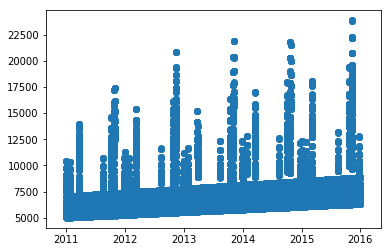

In [10]:
plt.scatter(df.Dep_Date, df.Price)

In [103]:
max(df.year)

2015

In [107]:
base_price_df = df[df.Days_to_Depart==60]

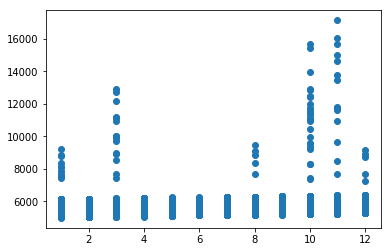

In [111]:
plt.scatter(base_price_df.month, base_price_df.Price)

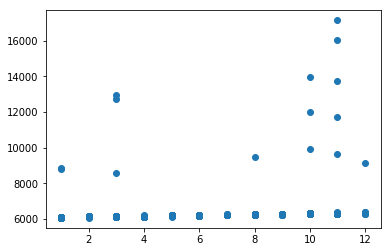

In [112]:
plt.scatter(base_price_df[base_price_df.year==2015].month, base_price_df[base_price_df.year==2015].Price)

In [115]:
base_price_df[(base_price_df.year==2015) & (base_price_df.Price>8000)]

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings,month,weekday,Sales,Difference_To_Market,year
1461,2015-01-01,60,8870.0,8989.95,8.0,1,3,70960.0,-119.95,2015
1486,2015-01-26,60,8815.0,8754.50,8.0,1,0,70520.0,60.50,2015
1523,2015-03-04,60,12945.0,12748.08,7.0,3,2,90615.0,196.92,2015
1524,2015-03-05,60,8558.0,8346.29,5.0,3,3,42790.0,211.71,2015
1525,2015-03-06,60,12712.0,13119.54,9.0,3,4,114408.0,-407.54,2015
1687,2015-08-15,60,9486.0,9283.37,9.0,8,5,85374.0,202.63,2015
1754,2015-10-21,60,13950.0,14534.09,10.0,10,2,139500.0,-584.09,2015
1755,2015-10-22,60,9934.0,9213.13,10.0,10,3,99340.0,720.87,2015
1756,2015-10-23,60,12000.0,12201.35,6.0,10,4,72000.0,-201.35,2015
1773,2015-11-09,60,16053.0,16871.06,5.0,11,0,80265.0,-818.06,2015


In [143]:
df['day_of_month'] = df.Dep_Date.apply(lambda x: x.day)
df.head(2)

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings,month,weekday,Sales,Difference_To_Market,year,day_of_month
0,2011-01-01,60,7541.0,7529.91,3.0,1,5,22623.0,11.09,2011,1
1,2011-01-02,60,5032.0,4625.46,4.0,1,6,20128.0,406.54,2011,2


In [144]:
analysis_df = df[(df.year==2015) & (df.Days_to_Depart==60)][[col for col in df.columns if col not in ['Dep_Date','Days_to_Depart','year','Bookings','Comptt_Price_Median']]]
analysis_df.head()

,Price,month,weekday,Sales,Difference_To_Market,day_of_month
1461,8870.0,1,3,70960.0,-119.95,1
1462,6084.0,1,4,42588.0,-3.06,2
1463,6129.0,1,5,49032.0,-212.73,3
1464,6078.0,1,6,42546.0,502.56,4
1465,6067.0,1,0,36402.0,218.70,5


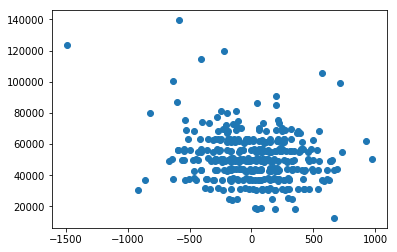

In [127]:
plt.scatter(analysis_df.Price-analysis_df.Comptt_Price_Median, analysis_df.Sales)

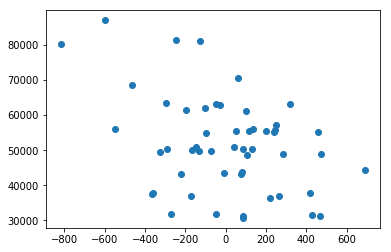

In [128]:
plt.scatter(analysis_df[analysis_df.weekday==0].Price-analysis_df[analysis_df.weekday==0].Comptt_Price_Median, analysis_df[analysis_df.weekday==0].Sales)

In [129]:
analysis_df.shape

(365, 5)

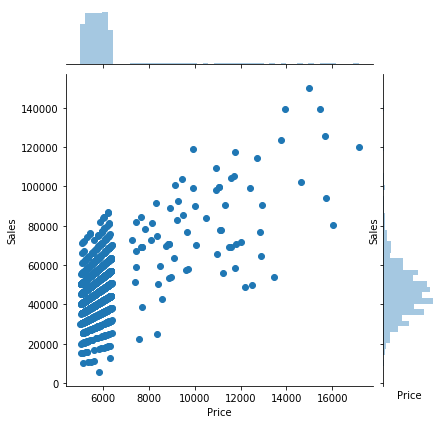

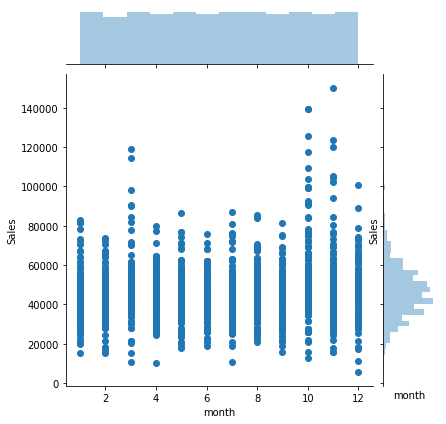

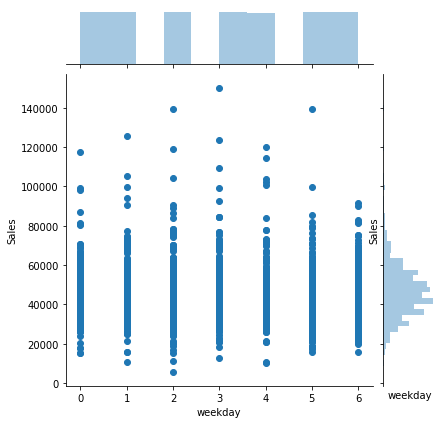

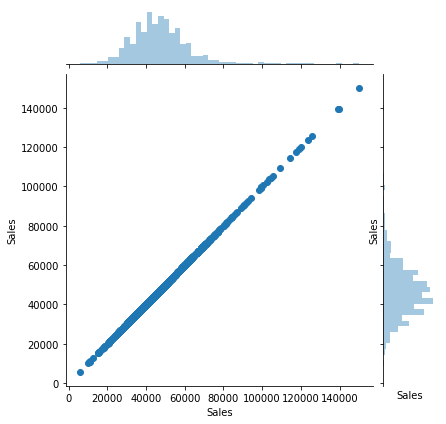

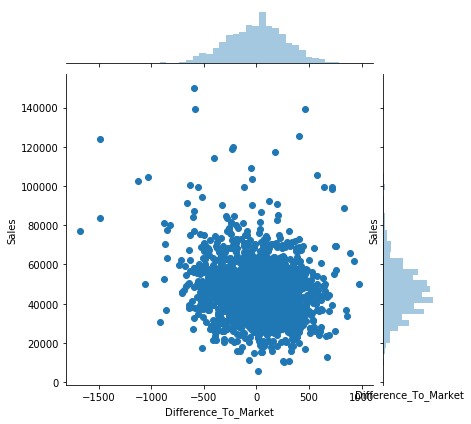

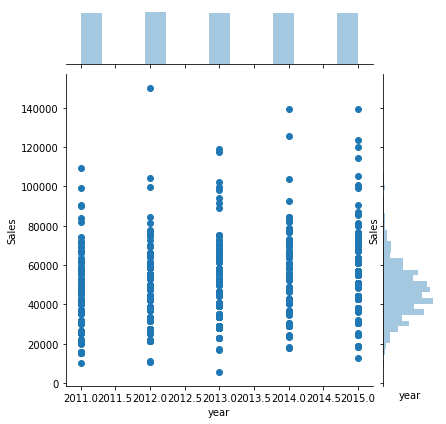

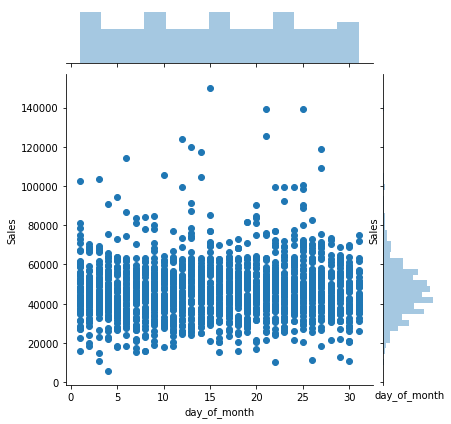

In [186]:
for f in analysis_df.columns:
    sns.jointplot(analysis_df[f], analysis_df['Sales'])
    #plt.scatter(analysis_df[f], analysis_df['Sales'])
    plt.xlabel(f)
    plt.ylabel('Sales')
    plt.show()

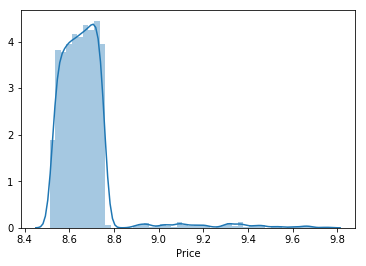

In [188]:
sns.distplot(np.log(analysis_df['Price']))

In [202]:
df['Price_log'] = np.log(df.Price)
df['Difference_To_Market_log'] = np.log(df['Price']) - np.log(df['Comptt_Price_Median'])

In [165]:
analysis_df = df[df.Days_to_Depart==60][[col for col in df.columns if col not in ['Dep_Date','Days_to_Depart','Bookings','Comptt_Price_Median']]]
analysis_df.shape

(1826, 7)

In [207]:
analysis_df_tr = df[df.Days_to_Depart==60][[col for col in df.columns if col not in ['Dep_Date','Days_to_Depart','Bookings','Comptt_Price_Median']]]
analysis_df_tr.shape, analysis_df_tr.head(2)

((1826, 9),
     Price  month  weekday    Sales  Difference_To_Market  year  day_of_month  \
 0  7541.0      1        5  22623.0                 11.09  2011             1   
 1  5032.0      1        6  20128.0                406.54  2011             2   
 
    Price_log  Difference_To_Market_log  
 0   8.928110                  0.001472  
 1   8.523573                  0.084242  )

In [208]:
X_tr = analysis_df_tr.loc[:, ~analysis_df_tr.columns.isin(['Sales', 'Difference_To_Market', 'Price'])]
y = analysis_df_tr['Sales']
X_tr.head(2)

,month,weekday,year,day_of_month,Price_log,Difference_To_Market_log
0,1,5,2011,1,8.928110,0.001472
1,1,6,2011,2,8.523573,0.084242


In [262]:
analysis_df.head()

,Price,month,weekday,Sales,Difference_To_Market,year,day_of_month
0,7541.0,1,5,22623.0,11.09,2011,1
1,5032.0,1,6,20128.0,406.54,2011,2
2,5032.0,1,0,15096.0,-26.02,2011,3
3,5039.0,1,1,50390.0,50.76,2011,4
4,5055.0,1,2,50550.0,-214.14,2011,5


In [268]:
np.mean(analysis_df_scaled[0]), np.mean(analysis_df_scaled[:,3])

(-0.5528421803973129, -3.11300212819321e-17)

In [272]:
#X_scaled = 
analysis_df_scaled.shape, analysis_df_scaled[:,[0,1,2]].shape

((1826, 7), (1826, 3))

In [168]:
X = analysis_df.loc[:, analysis_df.columns != 'Sales']
y = analysis_df['Sales']

In [278]:
scaler = StandardScaler()
analysis_df_scaled = scaler.fit_transform(analysis_df)
f_indices = [0,1,2,4,5,6]
X_scaled = analysis_df_scaled[:,f_indices]
y_scaled = analysis_df_scaled[:,3]
X_scaled.shape, y_scaled.shape

C:\Users\i309535\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\i309535\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


((1826, 6), (1826,))

In [279]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(
    X_scaled, y_scaled, test_size=0.33, random_state=42)

X_scaled_train.shape, X_scaled_test.shape

((1223, 6), (603, 6))

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_tr)

C:\Users\i309535\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\i309535\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((1223, 6), (603, 6))

In [ ]:
def 

In [170]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(X_train, y_train) #training the algorithm
print('R2 scores:', lr.score(X_train, y_train), lr.score(X_test, y_test))
print('RMSE scores:', rmse(lr.predict(X_train), y_train), rmse(lr.predict(X_test), y_test))

R2 scores: 0.36014723873973953 0.23766001448172136
RMSE scores: 11897.69235336631 12062.081208617628


In [211]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(X_train, y_train) #training the algorithm
print('R2 scores:', lr.score(X_train, y_train), lr.score(X_test, y_test))
print('RMSE scores:', rmse(lr.predict(X_train), y_train), rmse(lr.predict(X_test), y_test))

R2 scores: 0.35976687606257785 0.2463922145210785
RMSE scores: 11901.22814007286 11992.799871899684


In [171]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Price,7.549362
month,-120.433686
weekday,-156.430560
Difference_To_Market,-6.713364
year,254.368506
day_of_month,87.395197


In [159]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Price,8752.835569
month,1474.085201
weekday,-401.217861
Difference_To_Market,-929.657937
day_of_month,-19.659777


In [155]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.4324214062286399, 0.015057794878486687)

In [160]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.4324214062286399, 0.015057794878486797)

In [161]:
rmse(lr.predict(X_train), y_train), rmse(lr.predict(X_test), y_test)

(12641.172827793547, 13644.495726464795)

In [172]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=5)
dtree = dtree.fit(X_train, y_train)
print('R2 scores:', dtree.score(X_train, y_train), dtree.score(X_test, y_test))
print('RMSE scores:', rmse(dtree.predict(X_train), y_train), rmse(dtree.predict(X_test), y_test))

R2 scores: 0.9293471691760286 -0.5304314241099637
RMSE scores: 3953.5523546690633 17090.502630587034


In [212]:
for depth in range(2,20):
    dtree = tree.DecisionTreeRegressor(max_depth=depth)
    dtree = dtree.fit(X_train, y_train)
    print('R2 scores:', dtree.score(X_train, y_train), dtree.score(X_test, y_test))
    print('RMSE scores:', rmse(dtree.predict(X_train), y_train), rmse(dtree.predict(X_test), y_test), '\n')

R2 scores: 0.33939226715532744 0.18516545908320825
RMSE scores: 12089.115787413364 12470.464015942016 

R2 scores: 0.3744503685766918 0.16058982286326307
RMSE scores: 11763.961565165815 12657.123376704243 

R2 scores: 0.39758364456235984 0.1566148711360692
RMSE scores: 11544.392601577887 12687.056319535517 

R2 scores: 0.42669081774558004 0.14506038712080904
RMSE scores: 11262.042435928714 12773.667827708941 

R2 scores: 0.46432662294373983 0.13835545740616984
RMSE scores: 10886.110589481405 12823.659240290757 

R2 scores: 0.5075923656551958 0.09638267963858659
RMSE scores: 10437.22628898104 13132.281140189916 

R2 scores: 0.5515174102953122 0.058502736601633964
RMSE scores: 9960.829464047936 13404.710199685673 

R2 scores: 0.5938913855639831 -0.03522988441543906
RMSE scores: 9478.591604297631 14056.147262841261 

R2 scores: 0.641512910797098 -0.1336463130431793
RMSE scores: 8905.523834341047 14709.119904691524 

R2 scores: 0.6953745159878643 -0.20561967171149553
RMSE scores: 8209.2943

In [214]:
dtree = tree.DecisionTreeRegressor(max_depth=2)
dtree = dtree.fit(X_train, y_train)

residues_tr = np.abs(dtree.predict(X_train) - y_train)
residues_te = np.abs(dtree.predict(X_test) - y_test)

In [216]:
np.std(residues_te), np.std(residues_tr)

(8072.063141592034, 7275.103120626895)

In [180]:
import xgboost
xg_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.007,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=2000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

xg_model.fit(X_train, y_train)
print('R2 scores:', xg_model.score(X_train, y_train), xg_model.score(X_test, y_test))
print('RMSE scores:', rmse(xg_model.predict(X_train), y_train), rmse(xg_model.predict(X_test), y_test), '\n')

C:\Users\i309535\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


R2 scores: 0.5284171088620976 0.22643708610580215
RMSE scores: 10214.138230677572 12150.543892265463 



In [256]:
from sklearn.ensemble import RandomForestRegressor

for md in range(2,11):
    rf = RandomForestRegressor(n_estimators=500, n_jobs=-1, oob_score=True, max_depth=md)

    rf.fit(X_train, y_train)
    print(md, ': R2 scores:', rf.score(X_train, y_train), rf.score(X_test, y_test))
    print(md, ': RMSE scores:', rmse(rf.predict(X_train), y_train), rmse(rf.predict(X_test), y_test), '\n')

2 : R2 scores: 0.3579620197702623 0.22257667159630456
2 : RMSE scores: 11917.991478792892 12180.824403504099 

3 : R2 scores: 0.3937694002362444 0.23081909752213325
3 : RMSE scores: 11580.882027533149 12116.080348218888 

4 : R2 scores: 0.42393491034839714 0.23636678437579395
4 : RMSE scores: 11289.078403054704 12072.307903348752 

5 : R2 scores: 0.4588665132707739 0.22847930542760642
5 : RMSE scores: 10941.450896878336 12134.494470743832 

6 : R2 scores: 0.5004512155171923 0.22970982974967025
6 : RMSE scores: 10512.636888640329 12124.813752362705 

7 : R2 scores: 0.5489421008728835 0.22584082302270347
7 : RMSE scores: 9989.387426392597 12155.225816044476 

8 : R2 scores: 0.599858953322888 0.22153819055812052
8 : RMSE scores: 9408.692232394409 12188.957252889268 

9 : R2 scores: 0.6517024147880477 0.2143502829177265
9 : RMSE scores: 8778.047819366837 12245.101165742553 

10 : R2 scores: 0.7026876720684752 0.2053401249522436
10 : RMSE scores: 8110.1552783502475 12315.116953930914 



In [259]:
for md in range(2,11):
    rf = RandomForestRegressor(n_estimators=500, n_jobs=-1, oob_score=True, max_depth=4, min_samples_split=md)

    rf.fit(X_train, y_train)
    print(md, ': R2 scores:', rf.score(X_train, y_train), rf.score(X_test, y_test))
    print(md, ': RMSE scores:', rmse(rf.predict(X_train), y_train), rmse(rf.predict(X_test), y_test), '\n')

2 : R2 scores: 0.42353015021016327 0.2344920785988971
2 : RMSE scores: 11293.043724557341 12087.117468742617 

3 : R2 scores: 0.423058145567787 0.23625781065471804
3 : RMSE scores: 11297.666063788884 12073.169257567291 

4 : R2 scores: 0.4224417653957311 0.23377471122375593
4 : RMSE scores: 11303.69942605293 12092.779639594468 

5 : R2 scores: 0.4199685744445709 0.23781505776844614
5 : RMSE scores: 11327.875639984131 12060.854564438418 

6 : R2 scores: 0.417691722032597 0.2387039657640313
6 : RMSE scores: 11350.087056939246 12053.819449232786 

7 : R2 scores: 0.4159643645463921 0.24061884175580905
7 : RMSE scores: 11366.909022702464 12038.65051304118 

8 : R2 scores: 0.4147327694014199 0.23818491022896293
8 : RMSE scores: 11378.887792920781 12057.927926973474 

9 : R2 scores: 0.41377514434875384 0.23797912236826513
9 : RMSE scores: 11388.193161260793 12059.556411152926 

10 : R2 scores: 0.41298854118889217 0.23905725982210835
10 : RMSE scores: 11395.831003354222 12051.02222136324 



In [260]:
rf = RandomForestRegressor(n_estimators=500, n_jobs=-1, oob_score=True, max_depth=4, min_samples_split=6)

rf.fit(X_train, y_train)
print(md, ': R2 scores:', rf.score(X_train, y_train), rf.score(X_test, y_test))
print(md, ': RMSE scores:', rmse(rf.predict(X_train), y_train), rmse(rf.predict(X_test), y_test), '\n')

10 : R2 scores: 0.4178352657936535 0.24031571624182335
10 : RMSE scores: 11348.688025993448 12041.053033823071 



In [177]:
list(zip(X.columns, xg_model.feature_importances_))

[('Price', 0.28690407),
 ('month', 0.12432528),
 ('weekday', 0.10717807),
 ('Difference_To_Market', 0.22234382),
 ('year', 0.106188454),
 ('day_of_month', 0.15306035)]

In [181]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

In [183]:
X_poly.shape, X.shape

((1826, 210), (1826, 6))

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((1223, 210), (603, 210))

In [191]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

lr_reg = RidgeCV(alphas=np.logspace(-6, 6, 13))
lr_reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [195]:
lr_reg.alpha_

1000000.0

In [197]:
sorted(lr_reg.coef_)

[-8.2562176434681,
 -5.613425847957842,
 -3.585423737526998,
 -3.056992615143491,
 -2.696431426192248,
 -2.0888593757022136,
 -2.03220703275656,
 -1.856485199801682,
 -1.7113894255950441,
 -1.62376879549808,
 -1.4879150390625,
 -1.4618125061970204,
 -1.3700204232300166,
 -0.9707550473394804,
 -0.9545178279600115,
 -0.90414640774563,
 -0.8709167548222467,
 -0.6896114663548829,
 -0.6795086703544939,
 -0.5601510151004732,
 -0.3815294756279286,
 -0.267729517350908,
 -0.24068567043491385,
 -0.23517523573147514,
 -0.22445496189538972,
 -0.2117919921875,
 -0.1197522372694948,
 -0.11577755280723068,
 -0.09024470760778058,
 -0.08211610722355545,
 -0.04001754659839207,
 -0.03539117321361118,
 -0.031562069430947304,
 -0.03006744384765625,
 -0.02929084137576865,
 -0.028291089078930298,
 -0.024559925898756774,
 -0.021915655663292455,
 -0.02011057535855798,
 -0.018877306529162752,
 -0.015829492397230638,
 -0.01461516774725169,
 -0.01122709913761355,
 -0.008493423461914062,
 -0.0070066581563428265,
 

In [198]:
print('R2 scores:', lr_reg.score(X_train, y_train), lr_reg.score(X_test, y_test))
print('RMSE scores:', rmse(lr_reg.predict(X_train), y_train), rmse(lr_reg.predict(X_test), y_test), '\n')

R2 scores: -3.0538332605179213e+26 -6.462735585119332e+26
RMSE scores: 2.5992339509390035e+17 3.512012816375944e+17 



In [138]:
def rmse(y_pred, y_true):
    return np.sqrt(np.mean(np.square(y_pred-y_true)))

In [199]:
X.columns

Index(['Price', 'month', 'weekday', 'Difference_To_Market', 'year',
       'day_of_month'],
      dtype='object')

In [250]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_train_pred, sigma = gp.predict(X_train, return_std=True)
y_test_pred, sigma = gp.predict(X_test, return_std=True)
print('Train error:', rmse(y_train_pred, y_train))
print('Test error:', rmse(y_test_pred, y_test))

Train error: 1.4883643881182507e-09
Test error: 13821.786897685812


In [239]:
kernel = RBF(1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_train_pred, sigma = gp.predict(X_train, return_std=True)
y_test_pred, sigma = gp.predict(X_test, return_std=True)
print('Train error:', rmse(y_train_pred, y_train))
print('Test error:', rmse(y_test_pred, y_test))

Train error: 4.910145569981401e-06
Test error: 49320.05346870467


In [240]:
gp

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=RBF(length_scale=1), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [253]:
gp = GaussianProcessRegressor(kernel=1.0 * RBF(1.0), normalize_y=True, n_restarts_optimizer=8)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_train_pred, sigma = gp.predict(X_train, return_std=True)
y_test_pred, sigma = gp.predict(X_test, return_std=True)
print('Train error:', rmse(y_train_pred, y_train))
print('Test error:', rmse(y_test_pred, y_test))

Train error: 1.7379705557540034e-11
Test error: 13821.785820842128


In [242]:
kernel = 1.0 * RBF(1.0)
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_train_pred, sigma = gp.predict(X_train, return_std=True)
y_test_pred, sigma = gp.predict(X_test, return_std=True)
print('Train error:', rmse(y_train_pred, y_train))
print('Test error:', rmse(y_test_pred, y_test))

Train error: 1.8355717758987285e-11
Test error: 13825.898340039505


In [249]:
kernel = 10 * RBF(10)

gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_train_pred, sigma = gp.predict(X_train, return_std=True)
y_test_pred, sigma = gp.predict(X_test, return_std=True)
print('Train error:', rmse(y_train_pred, y_train))
print('Test error:', rmse(y_test_pred, y_test))


Train error: 1.8355717758987285e-11
Test error: 13825.898340039505


In [283]:
dists = [0.001, 0.01, 0.1, 1, 10, 100]

for dist in dists:
    kernel = 1 * RBF(dist)

    gp = GaussianProcessRegressor(kernel=kernel)

    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X_scaled_train, y_scaled_train)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_train_pred, sigma = gp.predict(X_scaled_train, return_std=True)
    y_test_pred, sigma = gp.predict(X_scaled_test, return_std=True)

    print('Train error:', rmse(y_train_pred, y_scaled_train))
    print('Test error:', rmse(y_test_pred, y_scaled_test))

Train error: 9.771445154173156e-11
Test error: 0.9507981113393087
Train error: 9.771445154173156e-11
Test error: 0.9507981113393087
Train error: 1.0114982741602799e-10
Test error: 0.9580873589326402
Train error: 9.771451382350853e-11
Test error: 0.9507981113393087
Train error: 9.771482580017181e-11
Test error: 0.9507981113393087
Train error: 9.771479581950147e-11
Test error: 0.9507981113393087


In [238]:
gp

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [232]:
gaus_kernel = np.exp(-1/2.0 * np.power(x - y, 2) / 1)

gp = GaussianProcessRegressor(kernel=gaus_kernel)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_train_pred, sigma = gp.predict(X_train, return_std=True)
y_test_pred, sigma = gp.predict(X_test, return_std=True)
print('Train error:', rmse(y_train_pred, y_train))
print('Test error:', rmse(y_test_pred, y_test))

Train error: 0.0004517874769919925
Test error: 28350.514486757787


In [225]:
class GP(object):

    @classmethod
    def kernel_bell_shape(cls, x, y, delta=1.0):
        return np.exp(-1/2.0 * np.power(x - y, 2) / delta)

    @classmethod
    def kernel_laplacian(cls, x, y, delta=1):
        return np.exp(-1/2.0 * np.abs(x - y) / delta)

    @classmethod
    def generate_kernel(cls, kernel, delta=1):
        def wrapper(*args, **kwargs):
            kwargs.update({"delta": delta})
            return kernel(*args, **kwargs)
        return wrapper

    def __init__(self, x, y, cov_f=None, R=0):
        super().__init__()
        self.x = x
        self.y = y
        self.N = len(self.x)
        self.R = R

        self.sigma = []
        self.mean = []
        self.cov_f = cov_f if cov_f else self.kernel_bell_shape
        self.setup_sigma()

    @classmethod
    def calculate_sigma(cls, x, cov_f, R=0):
        N = len(x)
        sigma = np.ones((N, N))
        for i in range(N):
            for j in range(i+1, N):
                cov = cov_f(x[i], x[j])
                sigma[i][j] = cov
                sigma[j][i] = cov

        sigma = sigma + R * np.eye(N)
        return sigma

    def setup_sigma(self):
        self.sigma = self.calculate_sigma(self.x, self.cov_f, self.R)

    def predict(self, x):
        cov = 1 + self.R * self.cov_f(x, x)
        sigma_1_2 = np.zeros((self.N, 1))
        for i in range(self.N):
            sigma_1_2[i] = self.cov_f(self.x[i], x)

        # SIGMA_1_2 * SIGMA_1_1.I * (Y.T -M)
        # M IS ZERO
        m_expt = (sigma_1_2.T * np.mat(self.sigma).I) * np.mat(self.y).T
        # sigma_expt = cov - (sigma_1_2.T * np.mat(self.sigma).I) * sigma_1_2
        sigma_expt = cov + self.R - (sigma_1_2.T * np.mat(self.sigma).I) * sigma_1_2
        return m_expt, sigma_expt

    @staticmethod
    def get_probability(sigma, y, R):
        multiplier = np.power(np.linalg.det(2 * np.pi * sigma), -0.5)
        return multiplier * np.exp(
            (-0.5) * (np.mat(y) * np.dot(np.mat(sigma).I, y).T))

    def optimize(self, R_list, B_list):

        def cov_f_proxy(delta, f):
            def wrapper(*args, **kwargs):
                kwargs.update({"delta": delta})
                return f(*args, **kwargs)
            return wrapper

        best = (0, 0, 0)
        history = []
        for r in R_list:
            best_beta = (0, 0)
            for b in B_list:
                sigma = gaus.calculate_sigma(self.x, cov_f_proxy(b, self.cov_f), r)
                marginal = b* float(self.get_probability(sigma, self.y, r))
                if marginal > best_beta[0]:
                    best_beta = (marginal, b)
            history.append((best_beta[0], r, best_beta[1]))
        return sorted(history)[-1], np.mat(history)

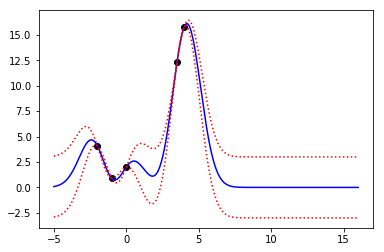

In [226]:
x = np.array([-2, -1, 0, 3.5, 4]);
y = np.array([4.1, 0.9, 2, 12.3, 15.8])
gaus = GP(x, y)

x_guess = np.linspace(-5, 16, 400)
y_pred = np.vectorize(gaus.predict)(x_guess)

plt.scatter(x, y, c="black")
plt.plot(x_guess, y_pred[0], c="b")
plt.plot(x_guess, y_pred[0] - np.sqrt(y_pred[1]) * 3, "r:")
plt.plot(x_guess, y_pred[0] + np.sqrt(y_pred[1]) * 3, "r:")

In [227]:
gaus = GP(X_train, y_train)
print('Train error:', rmse(gaus.predict(X_train), y_train))
print('Test error:', rmse(gaus.predict(X_test), y_test))

ValueError: setting an array element with a sequence.

In [137]:
np.sqrt(np.mean(np.square(y_train_pred- y_train)))

1.8061947878429808e-08

In [223]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'corr':['squared_exponential'], 'theta0': [0.01, 0.2, 0.8, 1.]},
                    {'corr':['cubic'], 'theta0': [0.01, 0.2,  0.8, 1.]}]

gp = GridSearchCV(GaussianProcessRegressor(), tuned_parameters, cv=5)

gp.fit(X_train, y_train)
print(gp.best_params_)


ValueError: Invalid parameter corr for estimator GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None). Check the list of available parameters with `estimator.get_params().keys()`.

In [218]:
from scipy.stats import pearsonr, spearmanr
pearsonr(X.day_of_month, y), spearmanr(X.day_of_month, y)

((0.04930232131242624, 0.03515126876198747),
 SpearmanrResult(correlation=0.04839265357575281, pvalue=0.03866854461326606))

In [123]:
import numpy as np
rmse = np.sqrt(np.mean(np.square(y_pred-y)))
rmse

2.5544712411608504e-07

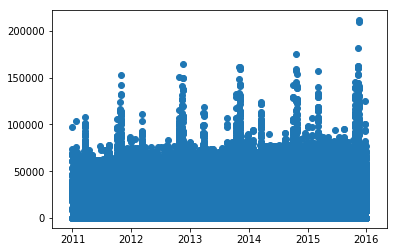

In [12]:
plt.scatter(df.Dep_Date, df.Bookings*df.Price)

In [13]:
df[df.Price>22500]

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings
104033,2015-11-13,4,23831.0,23727.23,0.0
105859,2015-11-13,3,23839.0,23629.20,0.0
107685,2015-11-13,2,23855.0,23879.20,0.0
109511,2015-11-13,1,23865.0,23194.12,2.0


Text(0, 0.5, '#Bookings')

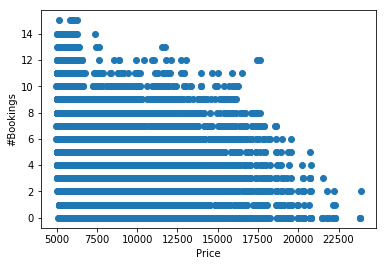

In [54]:
plt.scatter(df.Price, df.Bookings)
plt.xlabel('Price')
plt.ylabel('#Bookings')

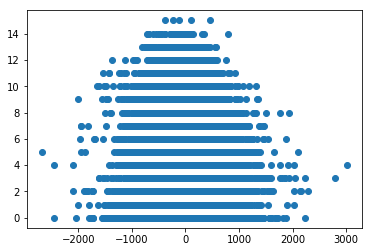

In [17]:
plt.scatter(df.Price-df.Comptt_Price_Median, df.Bookings)

Text(0, 0.5, 'Sales')

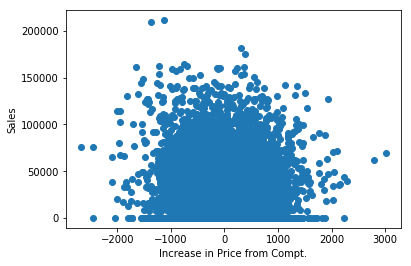

In [19]:
plt.scatter(df.Price-df.Comptt_Price_Median, df.Bookings*df.Price)
plt.xlabel('Increase in Price from Compt.')
plt.ylabel('Sales')

In [20]:
df[ df.Bookings*df.Price > 200000]

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings
21863,2015-11-13,49,17424.0,18797.99,12.0
27341,2015-11-13,46,17621.0,18755.40,12.0


In [21]:
min(df.Price), max(df.Price)

(4977.0, 23865.0)

In [22]:
df[df.Price==max(df.Price)]

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings
109511,2015-11-13,1,23865.0,23194.12,2.0


In [23]:
df[df.Days_to_Depart==60].shape

(1826, 5)

In [24]:
min(df[df.Days_to_Depart==60].Price), max(df[df.Days_to_Depart==60].Price)

(4977.0, 17153.0)

In [25]:
df[df.Price==max(df[df.Days_to_Depart==60].Price)]

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings
1777,2015-11-13,60,17153.0,17374.45,7.0


In [26]:
min(df.Comptt_Price_Median)

4187.19

In [43]:
df['month'] = df.Dep_Date.apply(lambda x: x.month)
df['weekday'] = df.Dep_Date.apply(lambda x: x.weekday())

Text(0, 0.5, 'Price')

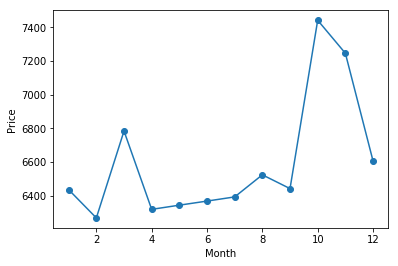

In [53]:
plt.plot(df.groupby('month')['Price'].mean(), marker = 'o')
plt.xlabel('Month')
plt.ylabel('Price')

Text(0, 0.5, 'Avg. Price')

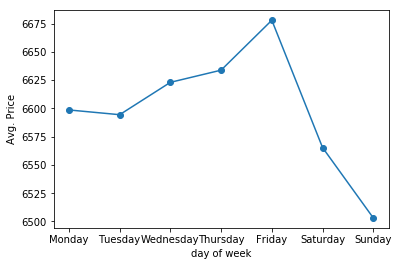

In [48]:
plt.plot([calendar.day_name[x]for x in range(7)], df.groupby('weekday')['Price'].mean(), marker = 'o')
plt.xlabel('day of week')
plt.ylabel('Avg. Price')

Text(0, 0.5, 'Median Price')

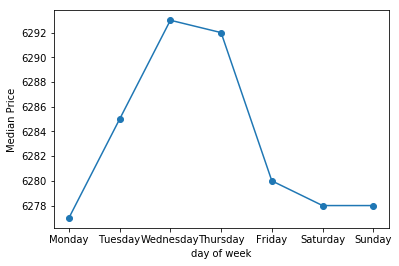

In [49]:
plt.plot([calendar.day_name[x]for x in range(7)], df.groupby('weekday')['Price'].median(), marker = 'o')
plt.xlabel('day of week')
plt.ylabel('Median Price')

Text(0, 0.5, 'Total Bookings')

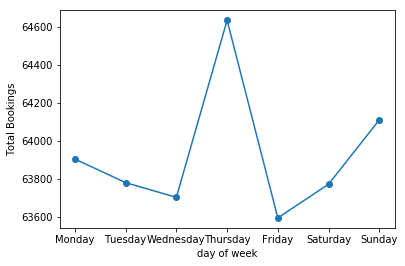

In [51]:
plt.plot([calendar.day_name[x]for x in range(7)], df.groupby('weekday')['Bookings'].sum(), marker = 'o')
plt.xlabel('day of week')
plt.ylabel('Total Bookings')

In [73]:
df['Sales'] = df['Bookings']*df['Price']

In [74]:
higher_priced = df[df.Price > df.Comptt_Price_Median]
lower_priced = df[df.Price > df.Comptt_Price_Median]
equal_priced = df[df.Price == df.Comptt_Price_Median]
lower_priced.shape, equal_priced.shape, higher_priced.shape, df.shape

((54623, 8), (2, 8), (54623, 8), (109560, 8))

In [59]:
equal_priced

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings,month,weekday
22755,2013-04-23,48,5736.0,5736.0,4.0,4,1
83885,2015-09-12,15,7601.0,7601.0,4.0,9,5


Text(0, 0.5, 'Avg Price')

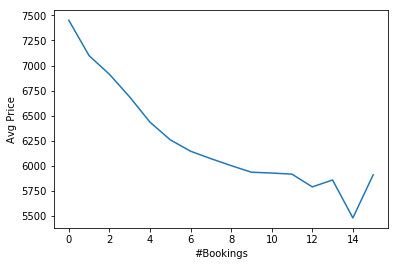

In [69]:
plt.plot(higher_priced.groupby('Bookings')['Price'].mean())
plt.xlabel('#Bookings')
plt.ylabel('Avg Price')

Text(0, 0.5, 'Avg Price')

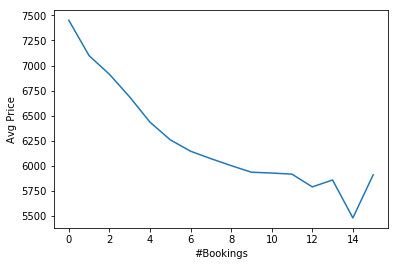

In [71]:
plt.plot(lower_priced.groupby('Bookings')['Price'].mean())
plt.xlabel('#Bookings')
plt.ylabel('Avg Price')

In [72]:
df[df.Bookings>14]

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings,month,weekday
1996,2011-06-20,59,5164.0,5292.24,15.0,6,0
2911,2013-12-21,59,5845.0,5381.54,15.0,12,5
3268,2014-12-13,59,6081.0,6312.22,15.0,12,5
8936,2015-06-21,56,6265.0,6639.86,15.0,6,6
17654,2014-05-05,51,5974.0,5870.13,15.0,5,0


Text(0, 0.5, 'Avg Price')

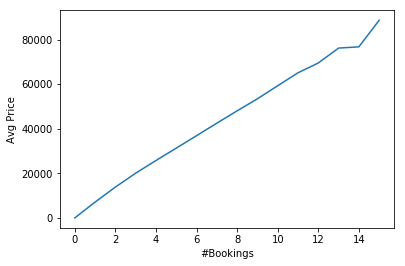

In [75]:
plt.plot(lower_priced.groupby('Bookings')['Sales'].mean())
plt.xlabel('#Bookings')
plt.ylabel('Avg Sales')

Text(0, 0.5, 'Sales')

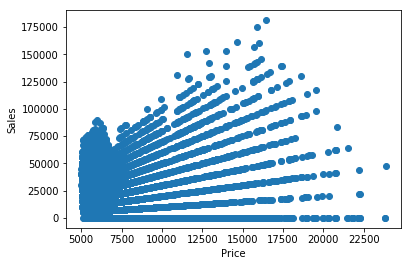

In [79]:
plt.scatter(lower_priced['Price'], lower_priced['Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')

In [78]:
lower_priced.groupby('Bookings')['Sales'].mean().reset_index()

,Bookings,Sales
0,0.0,0.000000
1,1.0,7098.481361
2,2.0,13826.019077
3,3.0,20060.343973
4,4.0,25740.203634
5,5.0,31295.148904
6,6.0,36872.096517
7,7.0,42497.318606
8,8.0,48010.989723
9,9.0,53421.400508


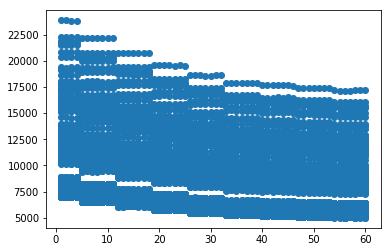

In [80]:
plt.scatter(df.Days_to_Depart, df.Price)

In [82]:
df[df.Days_to_Depart==1].sort_values('Price')

,Dep_Date,Days_to_Depart,Price,Comptt_Price_Median,Bookings,month,weekday,Sales
107742,2011-01-09,1,6956.0,7149.48,1.0,1,6,6956.0
107753,2011-01-20,1,6978.0,6467.30,2.0,1,3,13956.0
107737,2011-01-04,1,6987.0,6764.26,1.0,1,1,6987.0
107740,2011-01-07,1,6987.0,7498.09,0.0,1,4,0.0
107762,2011-01-29,1,6995.0,6739.83,0.0,1,5,0.0
107741,2011-01-08,1,6997.0,7035.37,0.0,1,5,0.0
107738,2011-01-05,1,6999.0,6963.67,0.0,1,2,0.0
107748,2011-01-15,1,7001.0,7687.86,0.0,1,5,0.0
107787,2011-02-23,1,7002.0,7502.28,0.0,2,2,0.0
107754,2011-01-21,1,7004.0,7634.06,0.0,1,4,0.0


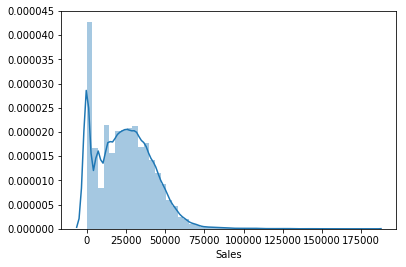

In [85]:
sns.distplot(lower_priced['Sales'])

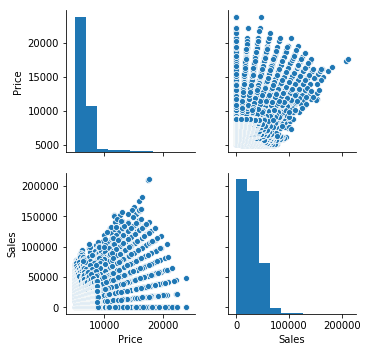

In [87]:
sns.pairplot(df[['Price','Sales']])

In [94]:
df['Difference_To_Market'] = df.Price - df.Comptt_Price_Median

In [88]:
df.columns

Index(['Dep_Date', 'Days_to_Depart', 'Price', 'Comptt_Price_Median',
       'Bookings', 'month', 'weekday', 'Sales'],
      dtype='object')

<BarContainer object of 5 artists>

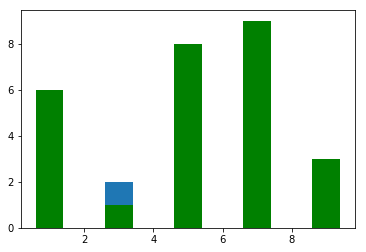

In [93]:
plt.bar([1,3,5,7,9],[5,2,7,8,2], label="Example one")
plt.bar([1,3,5,7,9],[6,1,8,9,3], label="Example one", color='g')